In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *

In [2]:
# CCAT-Prime
zmin = 3.5
zmax = 8.1

Omega_field = 8 #deg^2

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

Pei = 5.7e4 #Jy / sr CCAT-prime
Lambda = 0.01 # 1 / Mpc, usual cut for HI

In [3]:
# A choice about binning in chi
dchi = 0.5 * 1/Lambda # Mpc

In [4]:
print(dchi, 1/Lambda)

50.0 100.0


In [5]:
eIeI, eLOeLO, eIeLO, eLOeI = get_eHIeHI(Pei, chimin, chimax, dchi, Lambda, elems = True)
eHIeHI = eIeI + eLOeLO - eIeLO - eLOeI

computing eIeI
computing eIeLO
computing eLOeI
computing eLOeLO


100%|██████████| 256/256 [00:03<00:00, 70.64it/s]


In [6]:
def tmp_plot(field, dpi = None):
    vminmax = np.max(np.abs(field))
    plt.figure(figsize=(3.5,3.5), facecolor='w', dpi = dpi)

    # figure out bounds
    plot_window = 0.5*(chimax - chimin)
    left_chi = chimin - plot_window
    right_chi = chimax + plot_window

    # plot data
    plt.imshow(field, 
               origin='lower',
              cmap = 'seismic',
              vmin = -vminmax,
              vmax =  vminmax,
              extent=[chibs[0], chibs[-1], chibs[0], chibs[-1]])

    plt.colorbar()
    # set bounds
    plt.xlim(left_chi, right_chi)
    plt.ylim(left_chi, right_chi)

    plt.xlabel(r'$\chi$')
    plt.ylabel(r"$\chi'$")

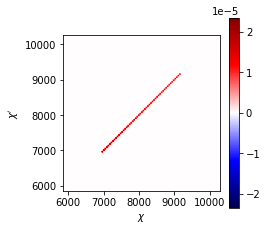

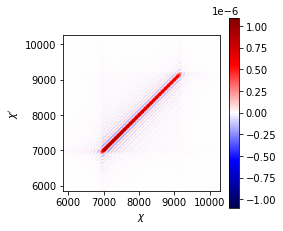

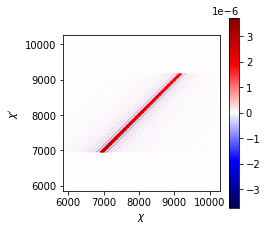

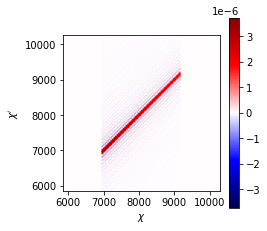

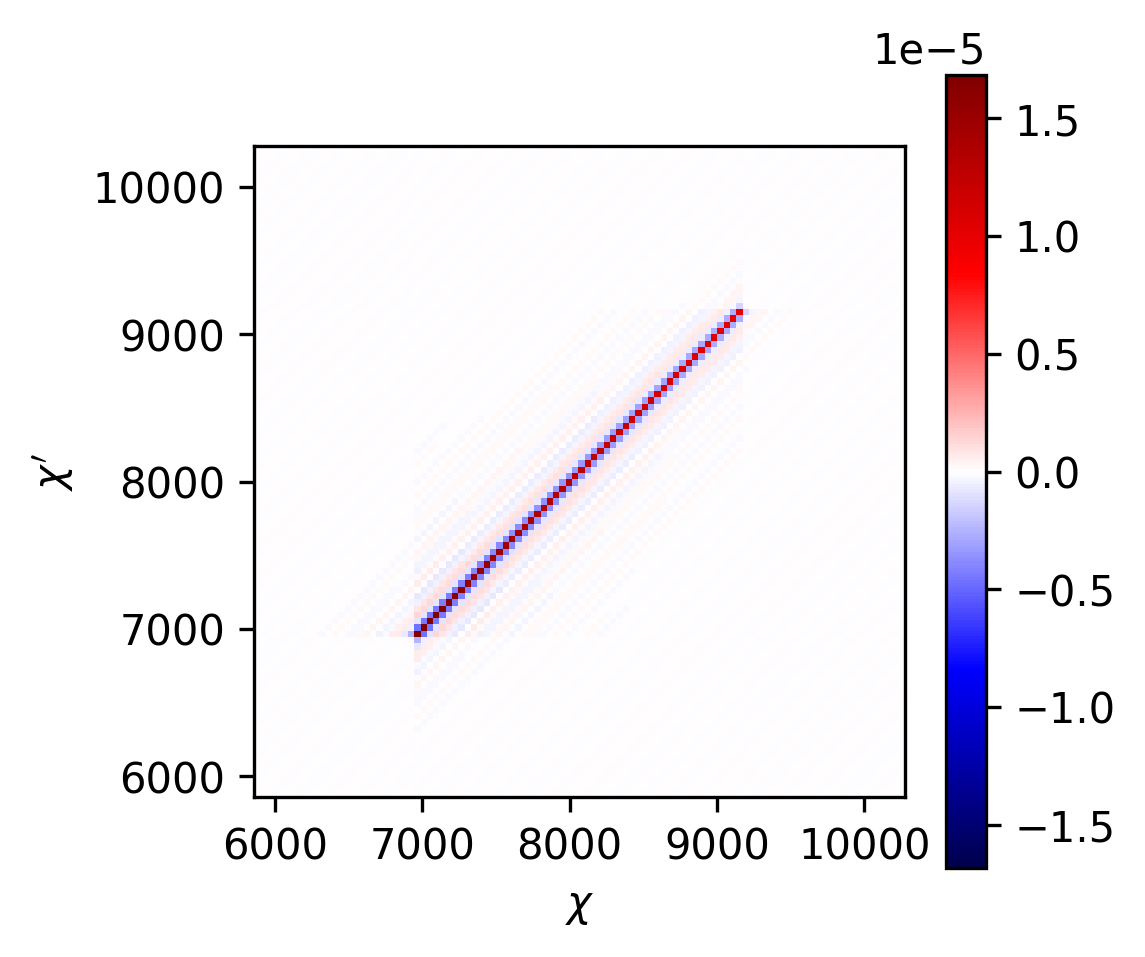

In [7]:
tmp_plot(eIeI)
tmp_plot(eLOeLO)
tmp_plot(eIeLO)
tmp_plot(eLOeI)
tmp_plot(eHIeHI, dpi = 300)

In [8]:
IHi_kappa_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f.npy'%(zmin, zmax, Lambda)
IHi_kappa = np.load(IHi_kappa_fname)

[]

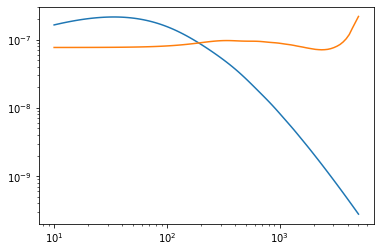

In [9]:
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD)


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)

    
plt.plot(ells, ClKK)
plt.plot(ells, f_N0(ells))
plt.loglog()

In [10]:
IHi_kappa.shape

(100, 256)

In [11]:
varKK = ClKK + f_N0(ells)
varKK = varKK.reshape(-1, 1)
print(varKK.shape)

(100, 1)


(1, 256)


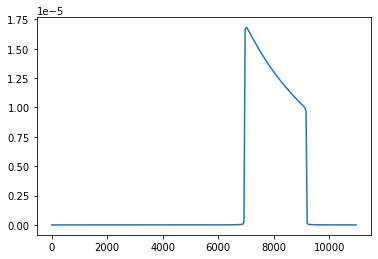

In [12]:
varLIM = np.diag(eHIeHI)
plt.plot(chibs, varLIM) # should be positive
varLIM = varLIM.reshape(1, -1)
print(varLIM.shape)

In [13]:
varNoiseDominated = varLIM * varKK

In [14]:
vminmax = np.max(np.abs(varNoiseDominated))

In [15]:
plt.rcParams['text.usetex'] = True

Text(0.5, 1.0, '$\\mathcal N_\\ell^{\\sf HI}(\\chi,\\chi)(\\mathcal O_\\ell^\\kappa + \\mathcal N_\\ell^\\kappa)$')

/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Casting input data from float128 to float64 for imshow.
  func(*args, **kwargs)
/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


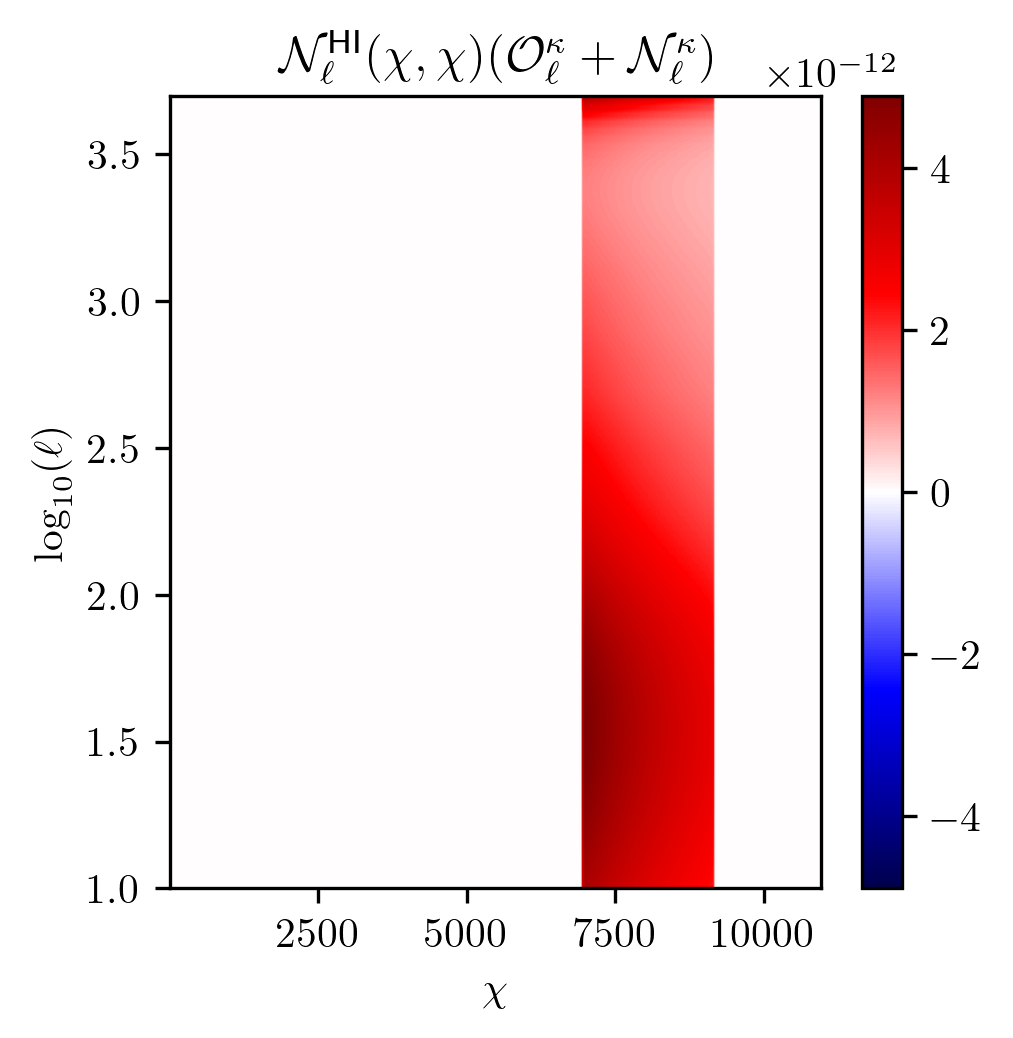

In [16]:
plt.figure(figsize=(3.5,3.5), dpi=300, facecolor='w',)
 
    
log_ymin = np.log10(ells[0])
log_ymax = np.log10(ells[-1])

# plot data
plt.imshow(varNoiseDominated, 
           origin='lower',
          cmap = 'seismic',
          vmin = -vminmax,
          vmax =  vminmax,
           aspect = 'auto',
          extent=[chibs[0], chibs[-1], log_ymin, log_ymax])

cbar = plt.colorbar()

# set bounds
plt.xlabel(r'$\chi$')
plt.ylabel(r"$\log_{10}(\ell)$")

plt.title(r'$\mathcal N_\ell^{\sf HI}(\chi,\chi)(\mathcal O_\ell^\kappa + \mathcal N_\ell^\kappa)$')

Text(0.5, 1.0, '$\\left(\\mathcal O_\\ell^{{\\sf HI},\\kappa}(\\chi)\\right)^2$')

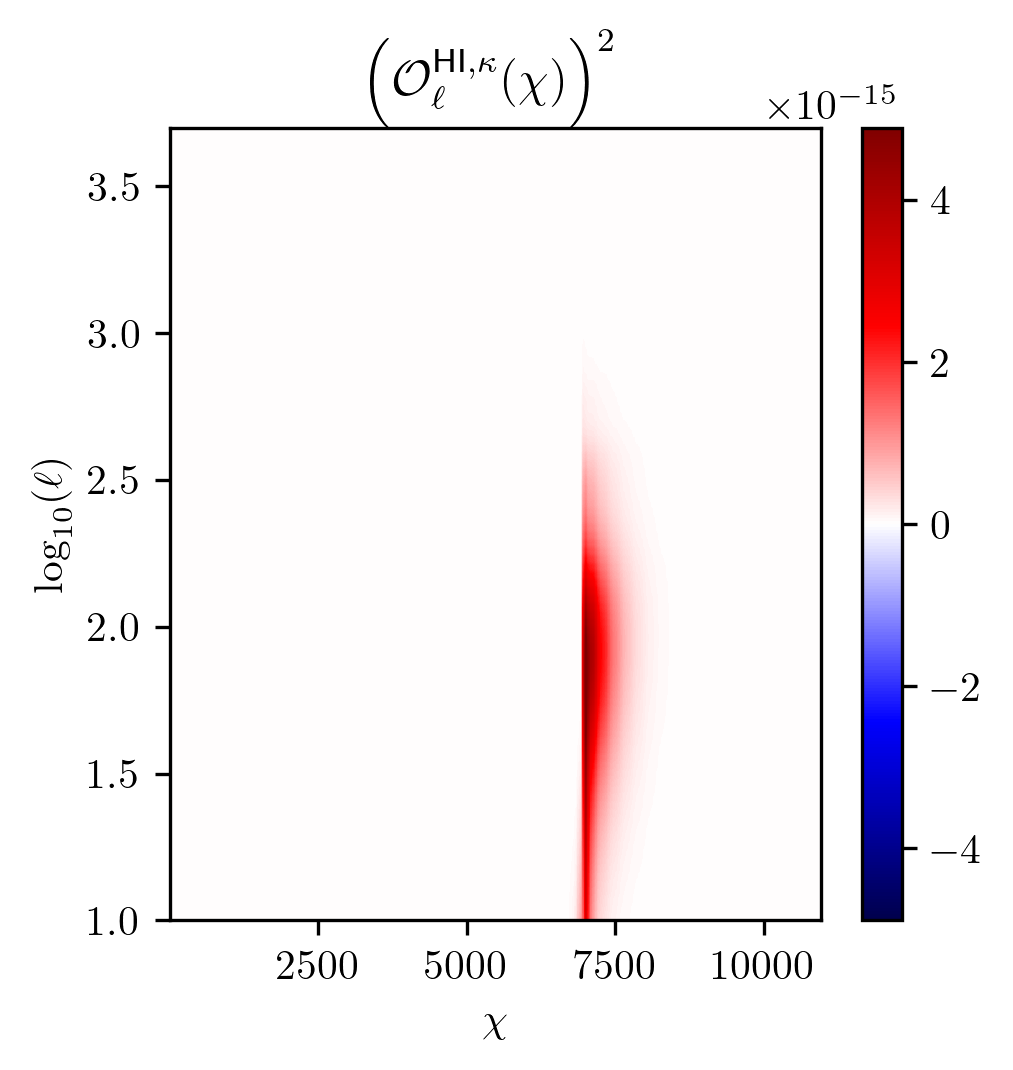

In [17]:
plt.figure(figsize=(3.5,3.5), dpi=300, facecolor='w',)
 
    
log_ymin = np.log10(ells[0])
log_ymax = np.log10(ells[-1])

# plot data
plt.imshow(IHi_kappa * IHi_kappa, 
           origin='lower',
          cmap = 'seismic',
          vmin = -vminmax/1000,
          vmax =  vminmax/1000,
           aspect = 'auto',
          extent=[chibs[0], chibs[-1], log_ymin, log_ymax])

cbar = plt.colorbar()

# set bounds
plt.xlabel(r'$\chi$')
plt.ylabel(r"$\log_{10}(\ell)$")

plt.title(r'$\left(\mathcal O_\ell^{{\sf HI},\kappa}(\chi)\right)^2$')

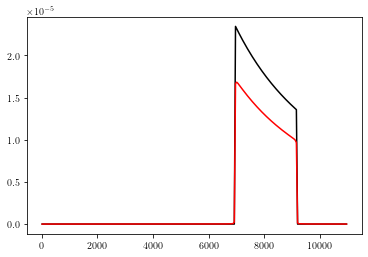

In [18]:
plt.plot(chibs, np.diag(eIeI), 'k')
plt.plot(chibs, np.diag(eHIeHI), 'r')